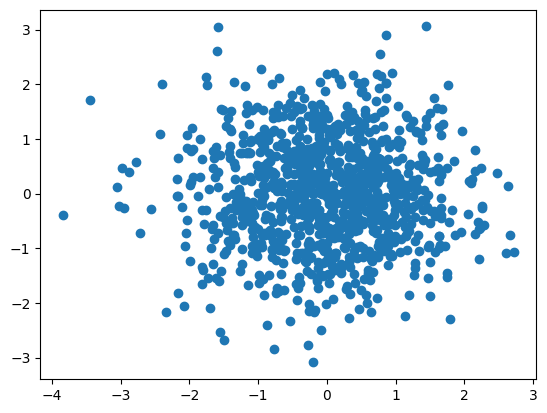

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

data = np.random.normal(0, 1, size=(1000, 2))

plt.scatter(data[:, 0], data[:, 1])

In [3]:
def pol_kern(t, s=3):
    return (1 + t)**s

def pol_deriv(t, s=3):
    return s * (1 + t)**(s - 1)

def dp_kern(a, b, q=pol_kern):
    return q(a.T @ b)

In [4]:
p = 20
n = data.shape[0]
X = (data @ data.T)[:p]
Psi = pol_kern(X) @ pol_kern(X).T
L = pol_deriv(X) @ pol_deriv(X).T
for i in range(p):
    for j in range(p):
        L[i][j] = L[i][j] * X[i][j]
eigenvalues, eigenvectors = la.eigh(L, Psi)
def f_est(i):
    def f(x):
        out = 0
        for j in range(p):
            out += eigenvectors[i][j] * dp_kern(data[j], x)
        return out
    return f



LinAlgError: The leading minor of order 11 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

In [9]:
Psi.shape

(20, 20)

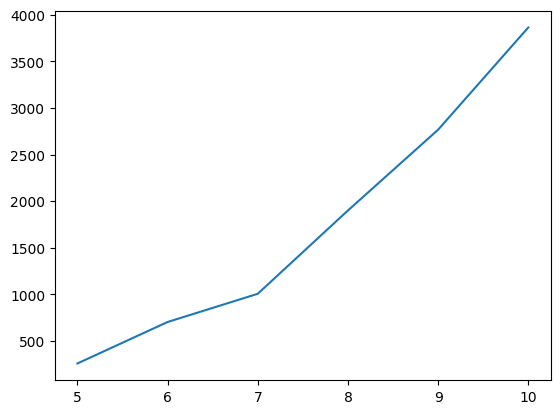

In [10]:
import matplotlib.pyplot as plt
cards = [5, 6, 7, 8, 9, 10]
ways = [259, 704, 1007, 1901, 2768, 3865]
plt.plot(cards, ways)         